In [ ]:
import json
import pandas as pd
from tqdm import tqdm
import src.sandbox as sandbox
from datasets import load_dataset
from datasets import Dataset, DatasetDict
from collections import defaultdict, Counter

In [ ]:
# If the dataset is gated/private, make sure you have run huggingface-cli login
ds = load_dataset("Elfsong/Caduceus_v7")

In [ ]:
def test_1(index):
    instance = eval_list[index]
    sb = sandbox.Sandbox()
    results = list()
    
    for index, solution in enumerate(instance['solutions']):        
        sample = {
            "solution": solution['solution'],
            "convert_offline": instance['convert_offline'],
            "evaluate_offline": instance['evaluate_offline'],
            "entry_point": instance['entry_point'],
            "test_cases": json.loads(instance['test_cases']),
            "solution_index": index,
            "timeout": 30
        }
    
        results += [sb.run_sample(sample)]

    return results

In [ ]:
from collections import defaultdict, Counter

failed_sample = defaultdict(list)

for s_index in tqdm(range(256)):
    results = test_1(s_index)
    for index, result in enumerate(results):
        if result['result'] != 'passed':
            print(s_index, result)
            failed_sample[s_index] += [result]

In [ ]:
counter = Counter()

In [ ]:
for instance in ds['eval']:
    l = len(instance['solutions'])
    counter[l] += 1

In [67]:
n_list, c_list = list(), list()
t_list = list()

for c in counter:
    n_list += [c]
    c_list += [counter[c]]
    t_list += [c] * counter[c]

In [69]:
len(t_list)

256

In [ ]:
data = {'count': c_list, 'num_of_solution': n_list}

In [ ]:
df = pd.DataFrame.from_dict(data)

,count,num_of_solution
0,15,14
1,18,15
2,2,30
3,25,20
4,2,3
5,17,16
6,14,21
7,9,25
8,4,26
9,22,17


In [59]:
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

[Text(0.5, 0, '')]

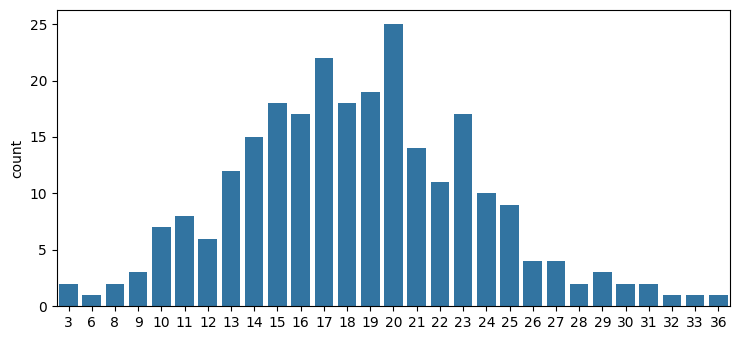

In [65]:
plt = sns.barplot(data=df, x='num_of_solution', y='count')
plt.set(xlabel=None)

In [ ]:
train_ds = Dataset.from_list(train_list)
eval_ds = Dataset.from_list(eval_list)
final_ds = DatasetDict({"train":train_ds, "eval":eval_ds})

In [ ]:
final_ds.push_to_hub('Elfsong/Caduceus_v7', private=True)

In [72]:
import statistics

In [73]:
statistics.mean(t_list)

18.4453125

In [74]:
statistics.median(t_list)

18.0

In [75]:
statistics.mode(t_list)

20

In [77]:
min(t_list)

3

In [78]:
max(t_list)

36